In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
# 0) Preapare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [9]:
# 1) Model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)


In [10]:
# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss= 498.948
epoch: 20, loss= 453.962
epoch: 30, loss= 421.174
epoch: 40, loss= 397.266
epoch: 50, loss= 379.825
epoch: 60, loss= 367.095
epoch: 70, loss= 357.802
epoch: 80, loss= 351.014
epoch: 90, loss= 346.056
epoch: 100, loss= 342.432


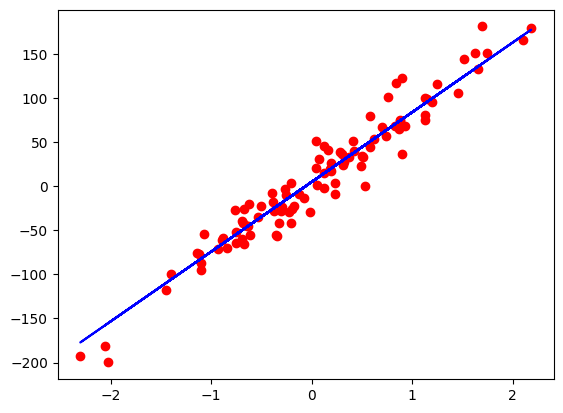

In [12]:
# 3) Training loop
num_iters = 100
for epoch in range(num_iters):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss= {loss.item():.3f}')
        
#plot
predicted = model(X).detach()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()